# 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

##### 지도학습: 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
##### 학습을 위해 주어진 데이터 세트: 학습 데이터 세트
##### 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트: 테스트 데이터 세트

In [1]:
# train_test_split(): 데이터 세트를 학습 데이터와 테스트 데이터로 분리
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [5]:
# 붓꽃 데이터 세트 로딩
iris=load_iris()

In [6]:
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data=iris.data

In [7]:
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label=iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [11]:
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
# 피처: 
# label: 붓꽃을 결정하는 결정값(=target 값) (Setosa, versicolor, virginica = target 칼럼)
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [12]:
# 학습용 데이터와 테스트용 데이터는 반드시 분리해야 함.
# train_test_split()으로 분리
# test_size 파라미터 입력값의 비율로 분할

In [13]:
# train_test_split()의 첫 번째 파라미터 iris_data: 피처 데이터 세트
# 두 번쨰 파라미터 iris_label: label 데이터 세트
# test_size=0.2 : 전체 데이터 세트 중 테스트 데이터 세트의 비율
# random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
# ramdom_state : 수행할때마다 동일한 데이터 세트로 분리해줌. 숫자는 아무거나 부여해도 상관 없음. 
# random값을 만드는 seed와 같은 의미.
X_train, X_test, y_train, y_test=train_test_split(iris_data, iris_label,
                                                 test_size=0.2, random_state=11)

In [14]:
# 머신러닝 분류 알고리즘의 하나인 의사결청 트리를 이용해 학습과 예측 수행해보기
# DecisionTreeClassifier 객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

In [15]:
# 학습 수행
# DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [16]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
# predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 저장
pred=dt_clf.predict(X_test)

In [17]:
# 예측 성능 평가하기. 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가.
# 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인.
# accuracy_score() 메서드의 첫번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트 입력
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.933333


In [1]:
# 학습용 80%의 피처 데이터세트
print(X_train)
# 테스트용 20%의 피처 데이터세트
print(x_test)
# 학습용 80%의 레이블 데이터세트
print(y_train)
# 테스트용 20%의 레이블 데이터세트
print(y_test)

NameError: name 'X_train' is not defined

#### 붓꽃 데이터 세트로 분류를 예측한 프로세스 정리
##### 1. 데이터 세트 분리
##### 2. 모델 학습
##### 3. 예측 수행
##### 4. 평가

# 사이킷런의 기반 프레임워크 익히기

## Estimator 이해 및 fit(), predict() 메서드

#### Estimator : 지도학습의 모든 알고리즘을 구현한 클래스
    fit() : ML 모델 학습
    predict() : 학습된 모델의 예측

#### ---------------------------------------- ####

#### 비지도학습인 차원 축소, 클러스터링, 피처 추출을 구현한 클래스도 fit()과 transform() 적용
    fit() : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업 (!= 지도학습의 fit())
    transform() : 구조 맞춤 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 실제 작업 수행

# 사이킷런의 주요 모듈 : p.94

#### 머신러닝 모델 구축 주요 프로세스 : 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 모델 평가 반복

# 내장된 예제 데이터 세트

+ 파이썬의 내장데이터는 보통 딕셔너리 형태로 되있다.
+ 키는 보통 data, target, target_name, feature_names, DESCR로 구성되있다.

+ target: 분류 시 레이블 값, 회기 시 숫자 결괏값 데이터 세트

In [22]:
from sklearn.datasets import load_iris

In [23]:
iris_data=load_iris()
print(type(iris_data))
# sklearn.utils.Bunch는 파이썬의 딕셔너리와 유사한 클래스

<class 'sklearn.utils.Bunch'>


In [24]:
keys=iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)
# 키는 피처들의 데이터값을 가리킴.

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
# 피처 데이터 값 추출을 위해서는 데이터 세트.data OR 데이터 세트['data']
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
print('\n feature_names의 type', type(iris_data.feature_names))
print('feature_names의 shape', len(iris_data.feature_names))
print(iris_data.feature_names)


 feature_names의 type <class 'list'>
feature_names의 shape 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
print('\n target_names의 type', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names)) # 세 개의 꽃 품종이니 3
print(iris_data.target_names)


 target_names의 type <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']


In [29]:
print('\n data의 type', type(iris_data.data))
print('data의 shape', len(iris_data.data))
print(iris_data.data)


 data의 type <class 'numpy.ndarray'>
data의 shape 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.

In [30]:
print('\n target의 type', type(iris_data.target))
print('target의 shape', len(iris_data.target))
print(iris_data.target)


 target의 type <class 'numpy.ndarray'>
target의 shape 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Model Selection 모듈

#### Model_Selection : 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()

In [31]:
from sklearn.datasets import load_iris

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data # 실제 값
train_label=iris.target # 결정값
dt_clf.fit(train_data, train_label) # fit으로 학습. fit(학습할 데이터, 학습할 타겟 레이블)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
# 학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


#### => 정확도가 100%임. 왜? 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문. 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터세트가 아닌 전용 테스트 데이터 세트여야 함.

+ train_test_split(피처 데이터 세트, 레이블 데이터 세트)

+ test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가
+ train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가
+ shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지. 디폴트는 True
+ random_state : 수행할때마다 다른 학습/테스트용 데이터 생성 방지

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
dt_clf = DecisionTreeClassifier()
iris_data=load_iris()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.3, random_state=121)

In [41]:
dt_clf.fit(X_train, y_train) # 학습용 피처값과 레이블값으로 학습시키기
pred=dt_clf.predict(X_test) # 테스트용 피처값의 레이블 예측 (반환값은 없지만 pred에 학습 결과값이 저장됨)
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred))) # 남은 30%의 테스트용 레이블과 학습 결과값 비교하여 정확도 측정

예측 정확도: 0.955556


## 교차 검증

#### 과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
#### 교차검증 : 이러한 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
#### 데이터 세트를 학습, 검증, 테스트 데이터 세트로 세분화해서 검증 데이터 세트로 최종 평가 이전에 학습된 모델을 다양하게 평가하는데 사용

### K 폴드 교차 검증

#### : K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행

#### : K개의 데이터 폴드 중 첫 번째부터 K-1개까지 학습하여 예측하고, 마지막 K번째 폴드에서 검증 수행

In [42]:
# 붓꽃데이터를 KFold 클래스를 이용해 교차 검증하고 예측 정확도 알아보기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.model_selection import KFold
import numpy as np

In [44]:
iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

In [45]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [49]:
n_iter=0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
    # 로우 인덱스가 학습용, 검정용으로 하나씩 포문에 적용됨
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test=features[train_index], features[test_index]
    y_train, y_test=label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    
    # 반복 시마다 정확도 측정
    accuracy=np.round(accuracy_score(y_test, pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도:0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도:0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도:0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도:0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


### Stratified K 폴드

#### : 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
#### : K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우 해결
#### : 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
#### 불균형한 분포도 레이블 : 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
# 주의 : StratifiedKFold에서는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 
# split()에 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터 세트도 반드시 필요
skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# => 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당되있음을 확인.

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    17
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    16
1    16
0    16
Name: label, dtype: int64


In [52]:
dt_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # skfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test=features[train_index], features[test_index]
    y_train, y_test=label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    
    # 반복 시마다 정확도 측정
    accuracy=np.round(accuracy_score(y_test, pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도:0.9804, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

#2 교차 검증 정확도:0.9216, 학습 데이터 크기: 99, 검증 데이터 크기: 51
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

#3 교차 검증 정확도:0.9792, 학습 데이터 크기: 102, 검증 데이터 크기: 48
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.9804 0.9216 0.9792]
n## 평균 검증 정확도: 0.9604


### 교차 검증을 보다 간편하게 - cross_val_score()

#### : stratifiedKFold의 모든 복잡한 과정을 한꺼번에 수행해준다.
    cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs)

+ estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier OR 회귀 알고리즘 클래스인 Regressor
+ X : 피처 데이터 세트
+ y : 레이블 데이터 세트
+ scoring : 예측 성능 평가 지표 기술
+ cv : 교차 검증 폴드 수

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [54]:
iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores=cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) # 지정된 횟수(3회)만큼 결괏값을 배열로 반환
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.9804 0.9216 0.9792]
평균 검증 정확도:  0.9604


## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

#### : 사이킷런은 GridSearchCV를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

#### GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터
+ estimator : classifier, regressor, pipeline
+ param+grid : key+리스트 값을 가지는 딕셔너리가 주어짐.
+ scoring : 예측 성능을 측정할 평가 방법을 지정한다.
+ cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.
+ refit : 디폴트가 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target,
                                                 test_size=0.2, random_state=121)
dtree=DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [60]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree=GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


#### scores_df 표의 주요 칼럼 해석
+ params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타냄.
+ rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냄. 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터이다.
+ mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값.

In [62]:
# 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과값이 각각 best_params_와 best_score_ 속성에 기록됨.
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0: .4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.9750


In [63]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator=grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됬으므로 별도 학습이 필요 없음
pred=estimator.predict(X_test) # 최적 학습이 된 estimator로 X_test 예측
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


# 데이터 전처리

#### : NaN, Null값은 허용되지 않으므로 Null값은 고정된 다른 값으로 변환해야 함.
#### : Null값이 얼마 되지 않는다면 피처의 평균값 등으로 대체, 많다면 해당 피처는 드롭하는게 좋다.
#### : 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음. 그래서 모든 문자열값은 인코딩돼서 숫자형으로 변환되야 함. 하지만, 불필요한 피처라고 판단되면 삭제하는게 좋음.

## 데이터 인코딩

### 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기','선풍기','믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [66]:
# 데이터가 클 경우 각 문자열 값이 어떤 숫자로 인코딩됐는지 알려면
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [67]:
# inverse_transform() : 인코딩된 값을 다시 디코딩하기
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [68]:
# 주의 : 레이블 인코딩은 문자열을 숫자로 바꾸는데, 숫자의 크고 작음에 대한 특성이 반영되기 때문에 회귀 알고리즘엔 사용할 수 없음.

### 원-핫 인코딩(One-Hot Encoding)

#### 원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식 (= 더미변수)

#### 주의사항
    1. OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환되야 함.
    2. 입력 값으로 2차원 데이터가 필요함.

In [69]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [70]:
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

# 2차원 데이터로 변환
labels=labels.reshape(-1, 1) # 열을 1개로, 행은 열에 맞추어 가변

# 원-핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [71]:
# 판다스의 get_dummies() : 원-핫 인코딩 더 쉽게. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환.
import pandas as pd

df=pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화

#### : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
#### 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
#### 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념. 개별 데이터의 크기를 모두 똑같은 단위로 변경.
#### normalizer 모듈 : 개별 벡터의 크기를 맞추기 위해 변환하는 것 (!=일반적인 정규화)

## StandardScaler

#### : 개별 피처를 평균이 0이고 분산이 1인 값으로 변환. 
#### 특히 사이킷런에서 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 됨.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [3]:
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler=StandardScaler()



In [101]:
print(iris_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


In [102]:
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [103]:
# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler

#### : 데이터값을 0과 1사이의 범위 값으로 변환

In [4]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler=MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환되 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [5]:
titanic_df=pd.read_csv(r'/Users/air/Leena Python/MachineLearning/titanic/train.csv')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# 결측값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [9]:
# 문자열 피처 알아보기
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
D9               1
E50              1
B38              1
C50              1
C90              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


#### => Cabin의 경우 N이 687건으로 가장 많고, 속성값이 제대로 정리가 안되있음. 선실 번호 중 선실의 등급을 나타내는 첫 번쨰 알파벳이 중요해 보임. 왜냐면 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이기 때문.

In [11]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


#### 성별에 따른 생존자수를 비교해보자.

In [12]:

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count() # Sex와 Survived로 묶고 Survived의 개수 합

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

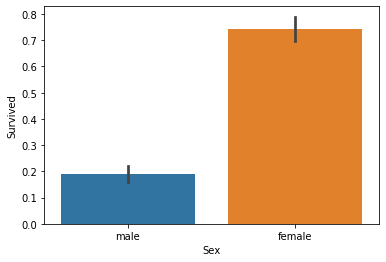

In [13]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

#### 부자와 가난한 사람들 간의 생존확률은 어떨까?

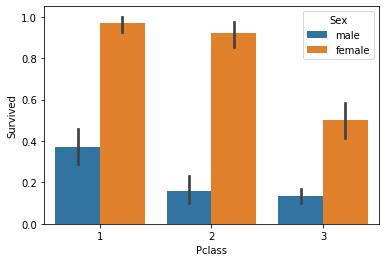

In [14]:
# hue='' : hue 파라미터를 추가해 객실과 성별 파라미터로 생존자 수 비교
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

#### 나이에 따른 생존확률은 어떨까?

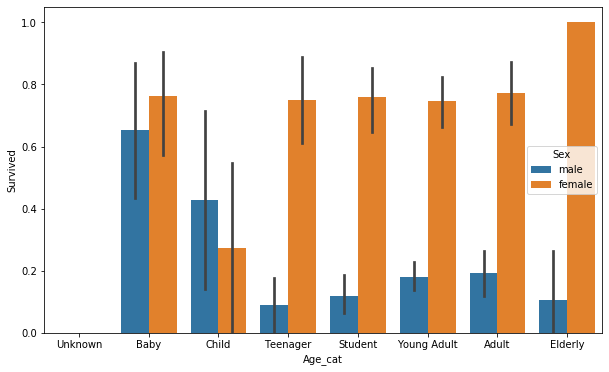

In [15]:
# 나이는 값의 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당.
# 입력 Age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else : cat='Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [16]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


#### 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들기

In [19]:

# transform_features() : 데이터의 전처리를 전체적으로 호출하는 함수

from sklearn.preprocessing import LabelEncoder

# Null처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

#### 데이터 전처리 함수를 만들었으니 이 함수를 이용해 다시 원본 데이터 가공해보기

In [20]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv(r'/Users/air/Leena Python/MachineLearning/titanic/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

X_titanic_df=transform_features(X_titanic_df)

In [21]:
# 내려받은 학습 데이터 세트를 기반으로 해서 train_test_split()을 이용해 별도의 테스트 데이터 세트 추출

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, 
                                                 test_size=0.2, random_state=11)

#### 본격적으로 ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측하기.


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

In [24]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [25]:
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도: 0.8324


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8659


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 교차검증으로 결정 트리 모델을 평가해보기

1. KFold, 폴드 수 5개

In [27]:
from sklearn.model_selection import KFold

In [31]:
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
    kfold=KFold(n_splits=folds)
    scores=[]
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 Index 생성
        # enumerate(반복할 객체) : 반복문 수행 시 몇번째 반복문인지를 튜플형태로 나타내줌. (반복 횟수, 값) 형태.
        X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        prediction=clf.predict(X_test)
        accuracy=accuracy_score(y_test, prediction)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        # 5개 fold에서 평균 정확도 계산
        mean_score=np.mean(scores)
        print("평균 정확도: {0:.4f}".format(mean_score))

In [32]:
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


2. cross_val_score() 교차검증

In [33]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.776536
교차 검증 2 정확도: 0.780899
교차 검증 3 정확도: 0.775281
교차 검증 4 정확도: 0.841808
평균 정확도: 0.7835


In [34]:
# => cross_val_score()와 방금 전 K폴드의 평균 정확도가 약간 다른 이유는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할했기 때문

3. GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정.

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={'max_depth':[2,3,5,10],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy-accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 :0.8418
